In [1]:
import warnings
warnings.filterwarnings("ignore")

Načítame si potrebné knižnice.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Načítame si dáta.

In [4]:
data = pd.read_excel("credit_cards.xlsx", header = 15)

Vymažeme prázdne riadky a stĺpce.

In [5]:
data = data.drop([0], axis = 0) 
data = data.drop("Unnamed: 0", axis = 'columns')

## Zoznámenie s dátami

In [6]:
print(data.head())

  CUST_ID      BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
1  C17342    27.625906     234.48              0.00                  234.48   
2  C13053  8791.161142       0.00              0.00                    0.00   
3  C11723   165.808096     981.19            823.39                  157.80   
4  C13717  4157.933876     929.20            631.40                  297.80   
5  C11464    19.945714     170.00            170.00                    0.00   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
1      0.000000               0.0           12.0        2500.0   109.281131   
2   3706.755143               4.0            0.0       12000.0  2244.627566   
3      0.000000               0.0           16.0        9000.0   672.446893   
4   2592.238013               8.0           12.0        8000.0   934.634439   
5      0.000000               0.0            1.0        6500.0   734.613034   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  BALANCE.1  

Každý záznam obsahuje dáta o pohyboch na platobnej karte konkrétneho zákazníka.

Popis dát:

CUST_ID: Credit card holder ID

BALANCE: Monthly average balance (based on daily balance averages)

BALANCE.1: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Total purchase amount spent during last 12 months

ONEOFF_PURCHASES: Total amount of one-off purchases
(One-off znamená, že bola zaplatená celá naraz, tj. nebola platená na splátky)

INSTALLMENTS_PURCHASES: Total amount of installment purchases

CASH_ADVANCE: Total cash-advance amount

PURCHASES.1: Frequency of purchases (Percent of months with at least one purchase)

ONEOFF_PURCHASES.1: Frequency of one-off-purchases

PURCHASES_INSTALLMENTS: Frequency of installment purchases
POZOR premenná sa volá takmer identicky ako INSTALMENTS_PURCHASES, ale táto vyjadruje frekvenciu!

CASH_ADVANCE.1: Cash-Advance frequency

AVERAGE_PURCHASE_TRX: Average amount per purchase transaction

CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX: Number of purchase transactions made

CREDIT_LIMIT: Credit limit

PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period

MINIMUM_PAYMENTS: Total minimum payments due in the period.

PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance

TENURE: Number of months as a customer

(12 znamená, že je zákaznikom 12+ mesiacov.)

In [8]:
print("Počet záznamov v dátach:", data.shape[0])

Počet záznamov v dátach: 4700


## Exploračná analýza

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 1 to 4700
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 4700 non-null   object 
 1   BALANCE                 4697 non-null   float64
 2   PURCHASES               4694 non-null   float64
 3   ONEOFF_PURCHASES        4693 non-null   float64
 4   INSTALLMENTS_PURCHASES  4699 non-null   float64
 5   CASH_ADVANCE            4695 non-null   float64
 6   CASH_ADVANCE_TRX        4698 non-null   float64
 7   PURCHASES_TRX           4700 non-null   float64
 8   CREDIT_LIMIT            4700 non-null   float64
 9   PAYMENTS                4695 non-null   float64
 10  MINIMUM_PAYMENTS        4526 non-null   float64
 11  PRC_FULL_PAYMENT        4696 non-null   float64
 12  BALANCE.1               4698 non-null   float64
 13  PURCHASES.1             4696 non-null   float64
 14  ONEOFF_PURCHASES.1      4695 non-null   

Všetko sú to numerické premenné. Premenné 11-16 vyjadrujú percentuálne hodnoty (sú v rozmedzí 0-1).

In [10]:
cust_id_counts = data['CUST_ID'].value_counts()

duplicate_cust_ids = cust_id_counts[cust_id_counts > 1]

print(duplicate_cust_ids)

CUST_ID
C17342    2
C10424    2
C13213    2
C18770    2
C13432    2
         ..
C10577    2
C11288    2
C13278    2
C17106    2
C13544    2
Name: count, Length: 198, dtype: int64


Máme 198 hodnôt CUST_ID ku ktorým je priradených viac záznamov.

In [11]:
def check_identical(group):
    return (group.iloc[1:] == group.iloc[0]).all(axis=1).all()

identical_check = data.groupby('CUST_ID').apply(check_identical)

non_identical_cust_ids = identical_check[identical_check == False]

sum(non_identical_cust_ids)

/var/folders/_m/7d1h2ffs43l2nl129sx6y81m0000gn/T/ipykernel_48916/2800703670.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  identical_check = data.groupby('CUST_ID').apply(check_identical)


0

Nemáme žiaden záznamy, ktoré by mali identické CUST_ID, ale rôžne hodnoty, takže duplicitné CUST_IDs môžeme vymazať.

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(4502, 18)

Vymazalo sa presne tých 198 hodnôt, ktoré sme našli so zhodnými CUST_IDs.

In [14]:
data.isnull().sum()

CUST_ID                     0
BALANCE                     3
PURCHASES                   6
ONEOFF_PURCHASES            6
INSTALLMENTS_PURCHASES      1
CASH_ADVANCE                3
CASH_ADVANCE_TRX            2
PURCHASES_TRX               0
CREDIT_LIMIT                0
PAYMENTS                    5
MINIMUM_PAYMENTS          166
PRC_FULL_PAYMENT            4
BALANCE.1                   2
PURCHASES.1                 4
ONEOFF_PURCHASES.1          5
PURCHASES_INSTALLMENTS      3
CASH_ADVANCE.1              2
TENURE                      3
dtype: int64

Máme viac chýbajúcich hodnôt. Väčšina je v premennej MINIMUM_PAYMENTS.

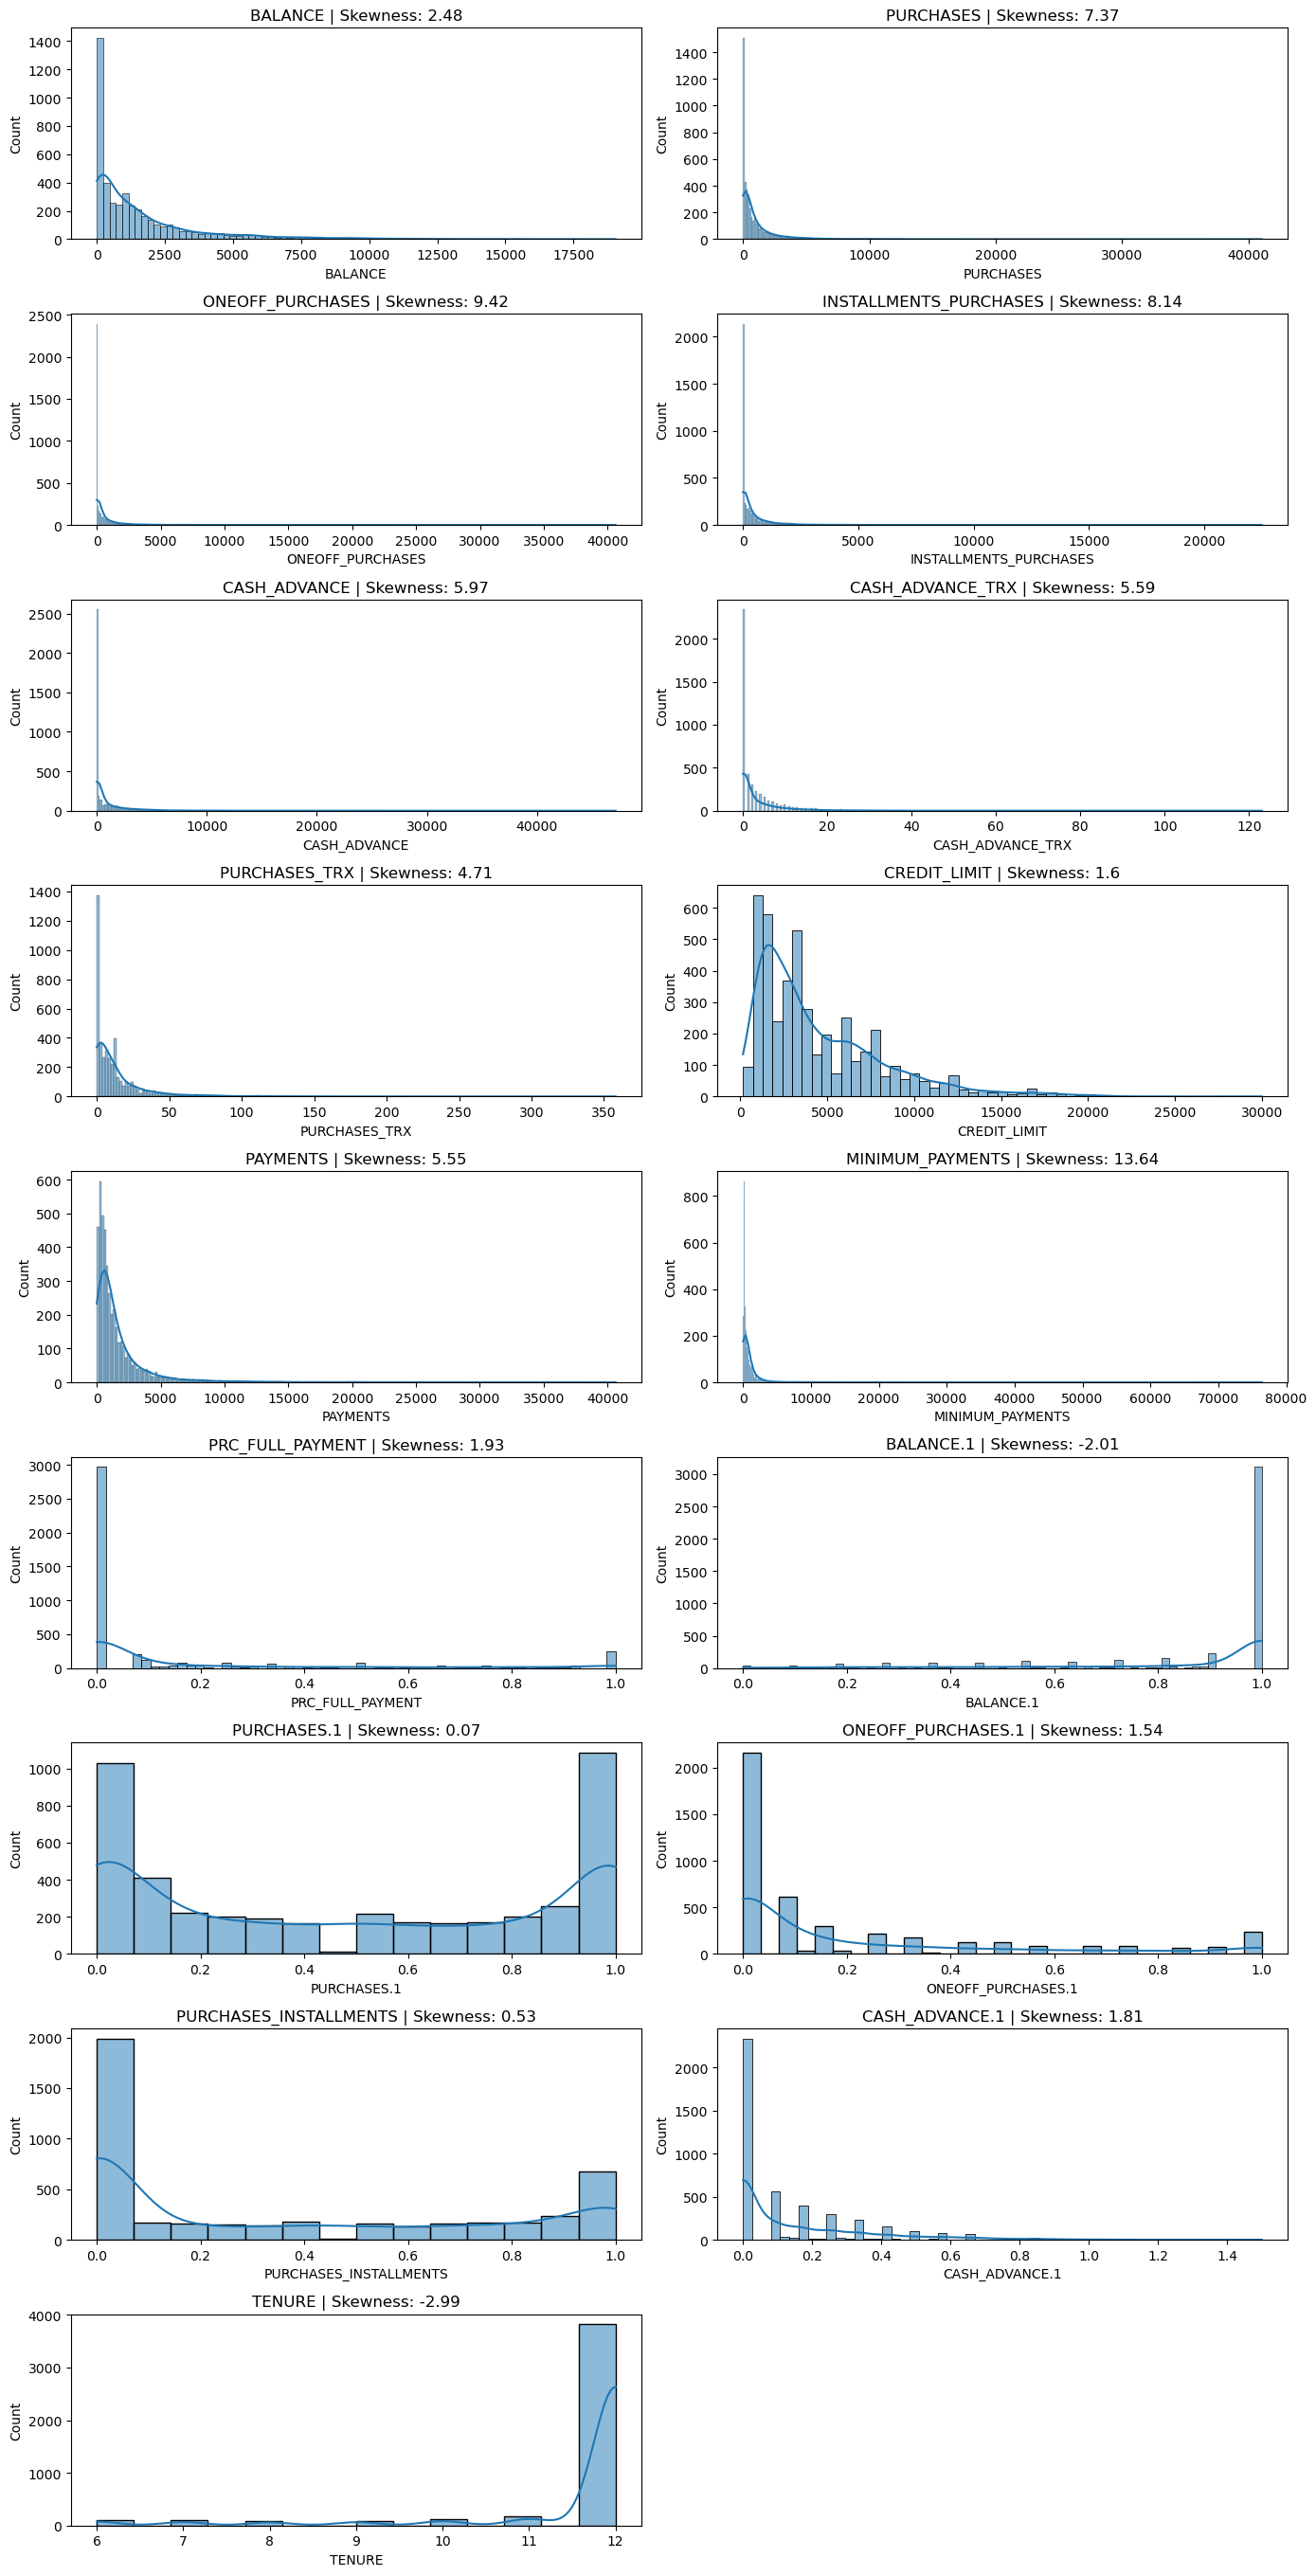

In [15]:
 
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()

Skewness (hodnota zašikmenia) je u takmer všetkých veľmi vysoká, takže naše dáta sú výrazne zašikmené. Naskytuje sa nám tu zvážiť štandardizáciu dát.

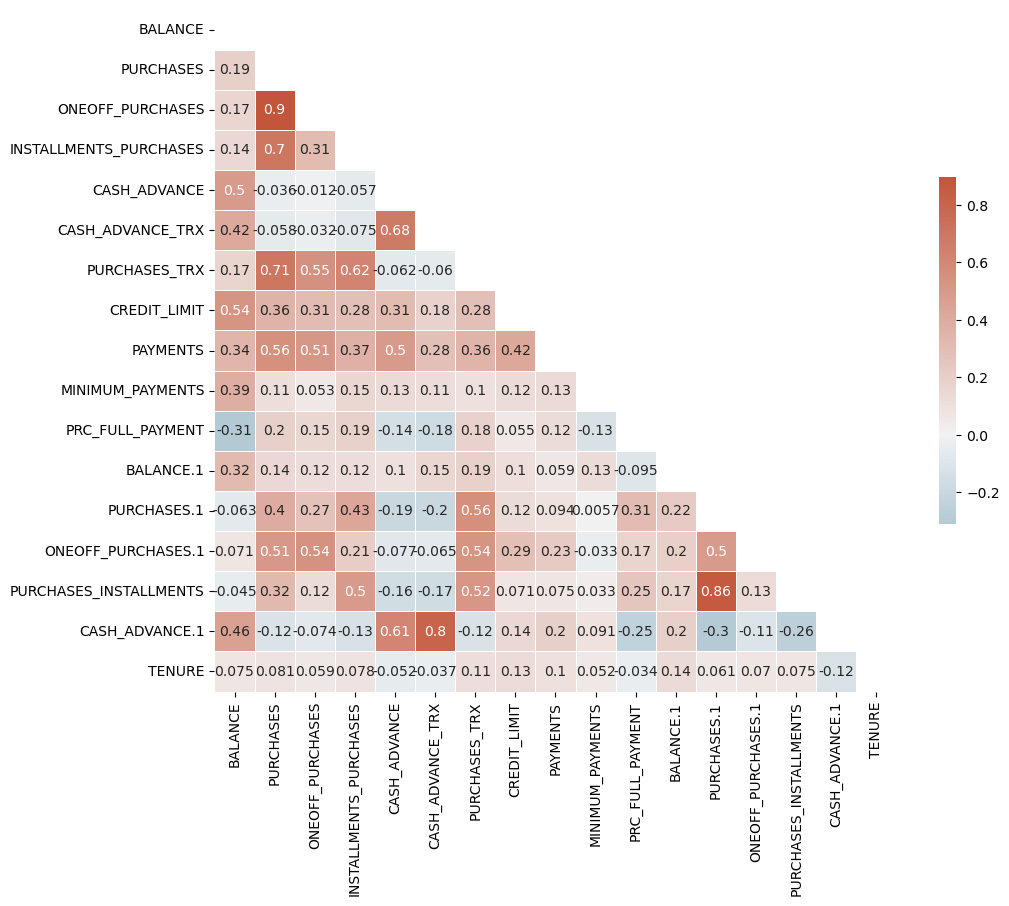

In [16]:
corr = data.drop('CUST_ID', axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Pri niektorých premenných sú viditelné výrazné závislosti, konkrétne u dvojíc CASH-ADVANCE-TRX x CASH_ADVANCE.1, PURCHASE_INSTALLMENTS x PURCHASES.1 a ONEOFF_PURCHASES x PURCHASES, INSTALLMENTS_PURCHASES x PURCHASES.

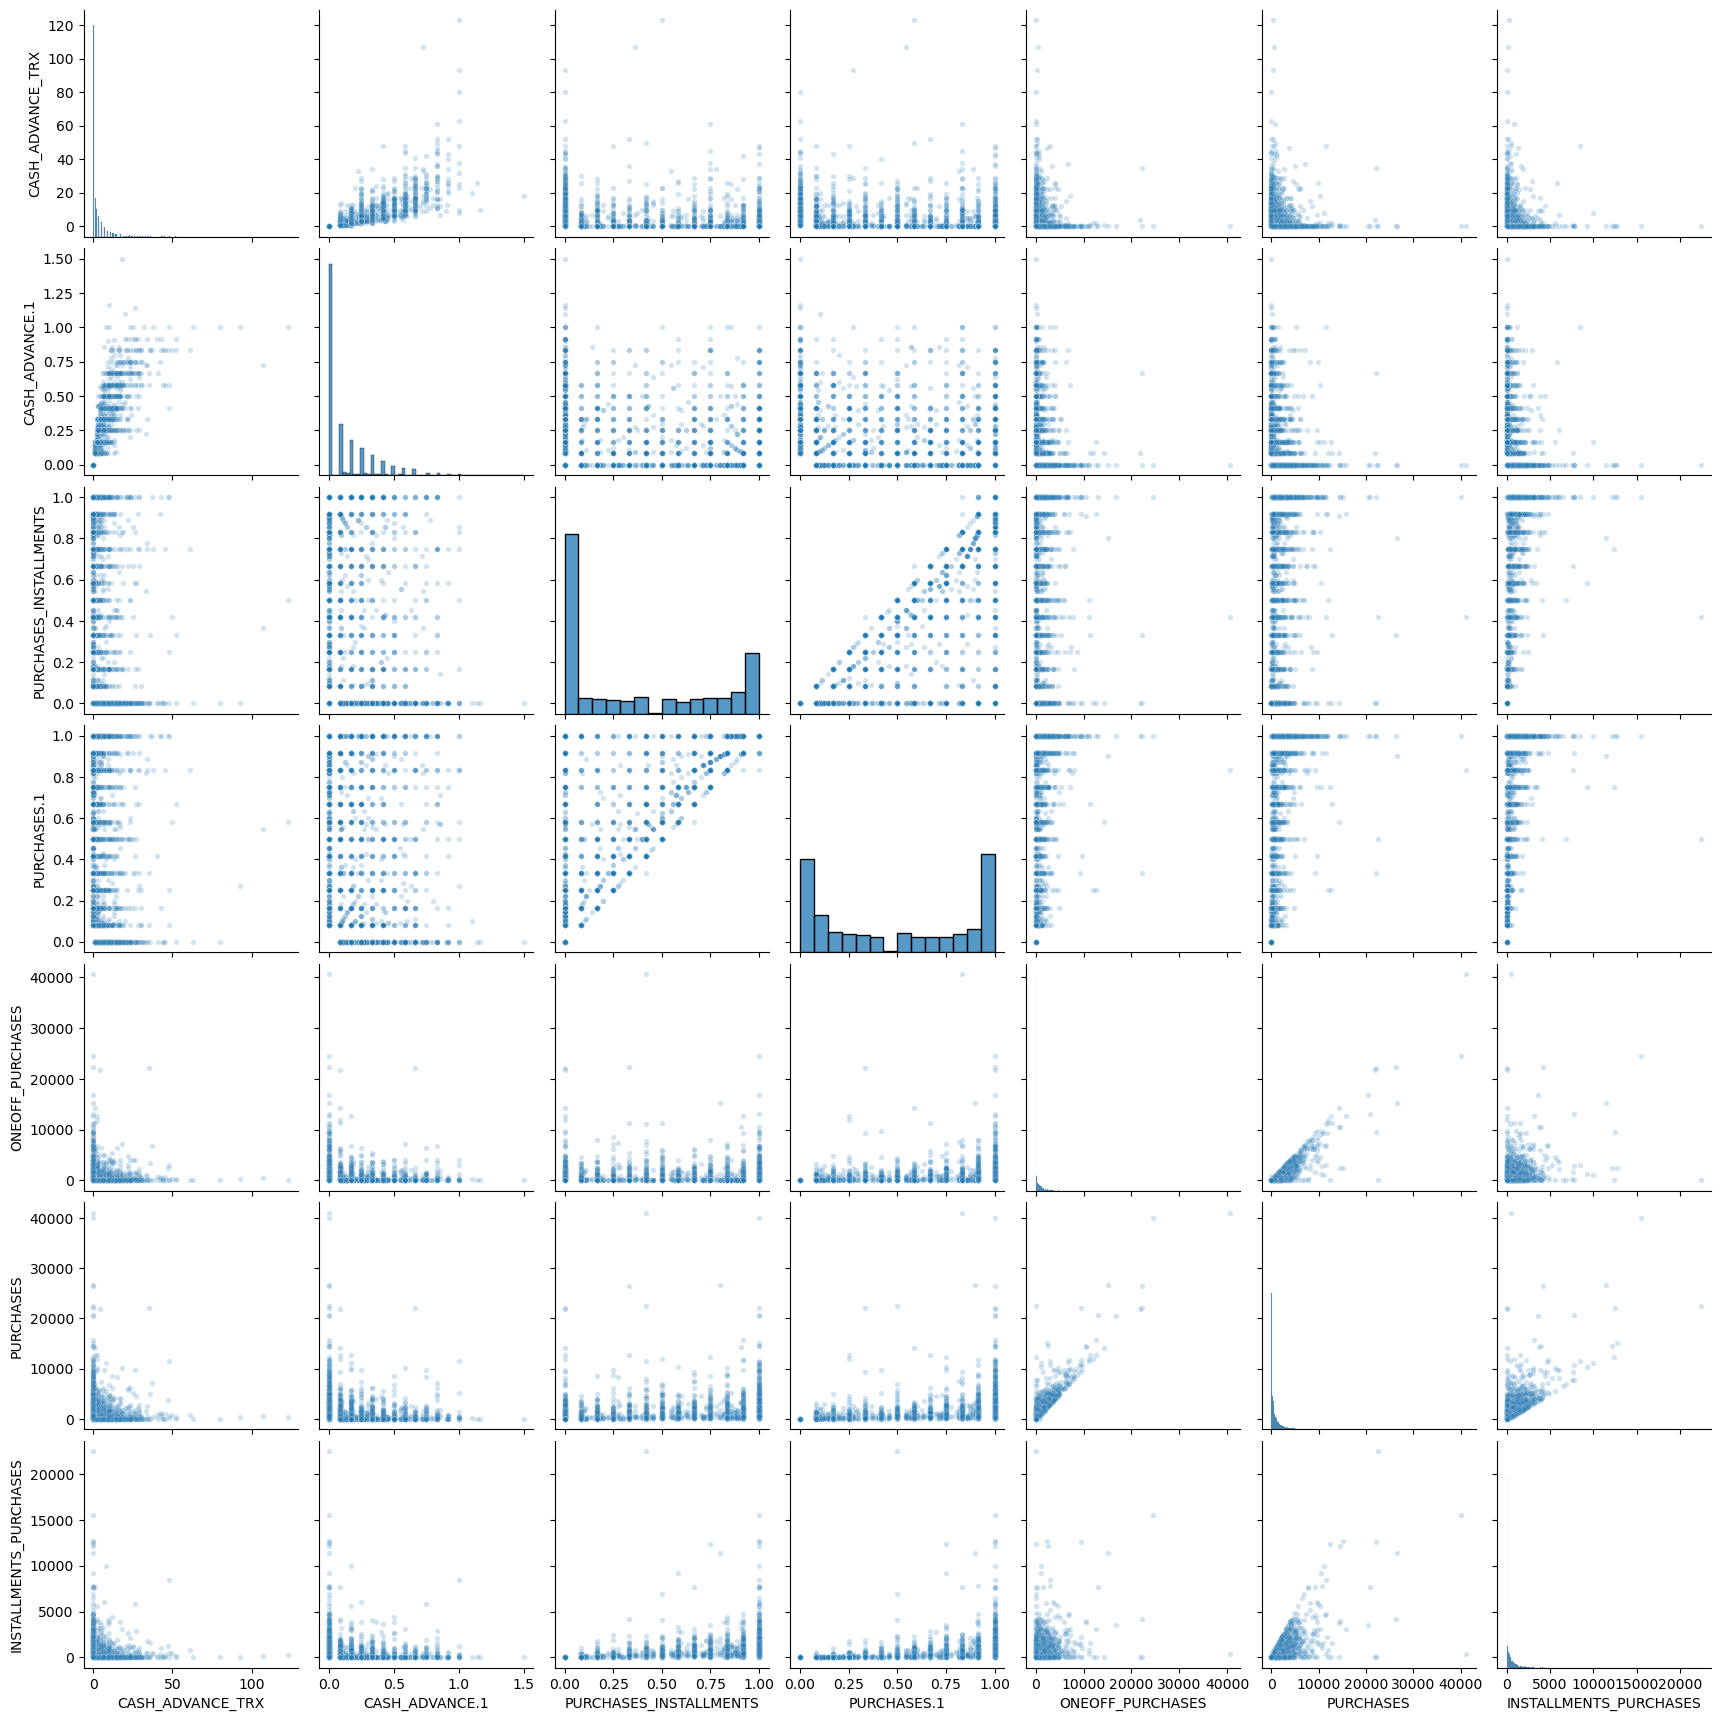

In [17]:
columns_subset = ["CASH_ADVANCE_TRX", "CASH_ADVANCE.1", "PURCHASES_INSTALLMENTS", "PURCHASES.1", "ONEOFF_PURCHASES", "PURCHASES", "INSTALLMENTS_PURCHASES"]

sns.pairplot(data[columns_subset], plot_kws={'s': 15, 'alpha' : 0.2})

plt.show()

U dvojíc CASH_ADVANCE_TRX a CASH_ADVANCE.1; ONEOFF_PURCHASES a PURCHASES aj na grafe je viditeľná lineárna závislosť. 
U dvojíc PURCHASES.1 a PURCHASES_INSTALLMENTS; PURCHASES a INSTALLMENTS_PURCHASES nevieme jednoznačne posúdiť.

In [18]:
mask = data.drop(columns=['MINIMUM_PAYMENTS']).isna().any(axis=1)

rows_with_na = data[mask]

print(rows_with_na)

     CUST_ID       BALANCE  PURCHASES  ONEOFF_PURCHASES  \
19    C13922   2875.669063       0.00              0.00   
22    C14545           NaN    1987.76           1062.44   
143   C11637   2000.797758    1037.50              0.00   
149   C13580   1710.418727       0.00              0.00   
294   C10544  15258.225900     529.30            529.30   
310   C17779     11.673388      76.00             76.00   
484   C14871     46.562160     261.16              0.00   
561   C15464    364.219107     142.52            142.52   
579   C14423   1032.812458     995.07            806.07   
667   C19024   2133.665075     320.00            320.00   
798   C13683    143.025504    1312.35           1312.35   
867   C17113   2292.167319     468.36               NaN   
876   C12754           NaN     262.00              0.00   
908   C16374     44.444599     374.81              0.00   
935   C16096    116.418751    1176.00              0.00   
1039  C11708     96.109401     938.20            938.20 

Vyzerajú to ako rozumné hodnoty. Preto by bolo najvhodnejšie NA nahradiť nejakou inou hodnotou. V prípade všetkých premenných okrem MINIMUM_PAYMENTS vzhľadom na malý počet chýbajúcich hodnôt ich môžeme nahradiť mediánom. V prípade MINIMUM_PAYMENTS by sme išli cestou KNN Imputing vzhľadom na veľký počet chýbajúcich hodnôt.

In [19]:
data['LOYAL_CUST'] = np.where(data['TENURE'] == 12, 1, 0)

Pridávame novú premennú, ktorá binárne rozďeľuje zákazníkov na tých, ktorý sú zákazníkmi aspoň rok a na nových, ktorý si založili účet v priebehu posledných 12 mesiacov.

## Predspracovanie dát

Vytvoríme si pipeline na doplnenie chýbajúcich hodnôt a zoškálovanie dát. Pre škálovanie sme použili MinMax.

In [21]:
data.drop(["CUST_ID"] , axis='columns', inplace = True)

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_transformer

preprocess_pipeline = make_pipeline(
    make_column_transformer(
        (KNNImputer(), ['MINIMUM_PAYMENTS']),
        remainder = SimpleImputer()
    ),
    MinMaxScaler(),
)

data_transformed = pd.DataFrame(preprocess_pipeline.fit_transform(data), columns=data.columns)

In [24]:
data_transformed.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,BALANCE.1,PURCHASES.1,ONEOFF_PURCHASES.1,PURCHASES_INSTALLMENTS,CASH_ADVANCE.1,TENURE,LOYAL_CUST
0,0.001225,0.001503,0.005736,0.000000,0.010421,0.000000,0.000000,0.033520,0.078727,0.002690,0.00,0.818182,1.000000,0.000000,1.000000,0.000000,1.000000,1.0
1,0.038168,0.461673,0.000024,0.000000,0.000000,0.078638,0.032520,0.000000,0.396985,0.055249,0.00,1.000000,0.000000,0.000000,0.000000,0.222222,1.000000,1.0
2,0.001379,0.008759,0.023926,0.020269,0.007013,0.000000,0.000000,0.044693,0.296482,0.016551,0.25,0.714286,0.714286,0.571429,0.285714,0.000000,0.166667,0.0
3,0.014089,0.218384,0.022659,0.015543,0.013236,0.054993,0.065041,0.033520,0.262982,0.023005,0.00,1.000000,0.583333,0.333333,0.250000,0.388889,1.000000,1.0
4,0.002173,0.001100,0.004166,0.004185,0.000000,0.000000,0.000000,0.002793,0.212730,0.018082,1.00,0.272727,0.083333,0.083333,0.000000,0.000000,1.000000,1.0
